In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [21]:
df=pd.read_csv('globalterrorismdb_0718dist.csv')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [23]:
df.shape

(181691, 135)

**Cleaning the Data**

In [24]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [25]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate",
    "city","latitude","longitude","location","summary","attacktype1_txt",
      "targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [26]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","procstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed",
                   "nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
df.head()


,Year,Month,Day,Country,Region,provstate,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [27]:
df.shape

(181691, 19)

In [28]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
provstate         421
City              434
Latitude         4556
Longitude        4557
Location       126196
Summary         66129
Attack Type         0
Target Type         0
Group Name          0
Motive         131130
Weapon Type         0
Killed          10313
Wounded         16311
Add Notes      153402
dtype: int64

In [29]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [30]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


**YEAR WISE ATTACKS**

1. Number of attacks each Year

In [38]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


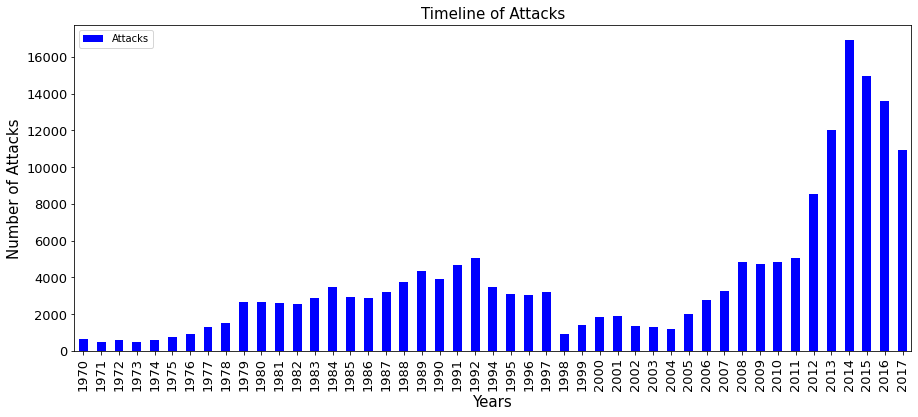

In [39]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

Maximum Attacks-2014

Minimum Attacks-1971

In [40]:
casualties=df[["Year","Casualty"]].groupby("Year").sum()
casualties.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


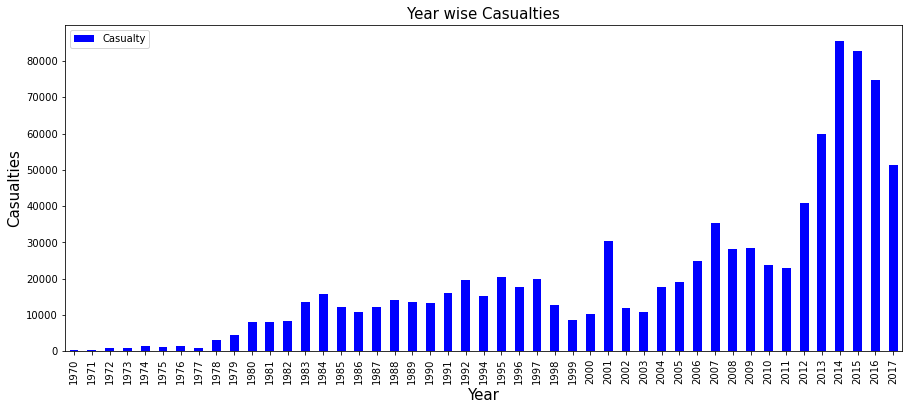

In [42]:
casualties.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Casualties",fontsize=15)
plt.show()

Number of People Killed and Wounded in each region

In [43]:
killed=df[["Year","Killed"]].groupby("Year").sum()
killed.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [44]:
wounded=df[["Year","Wounded"]].groupby("Year").sum()
wounded.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


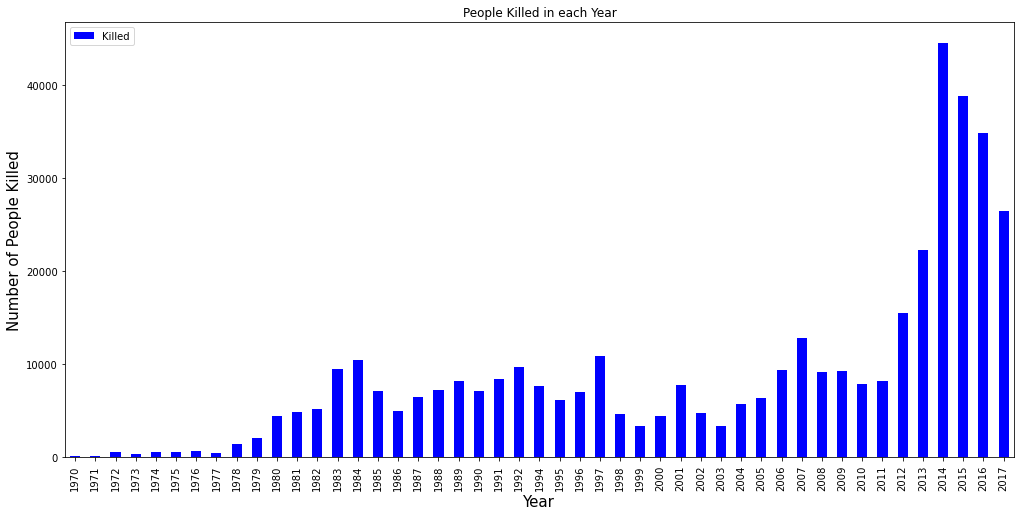

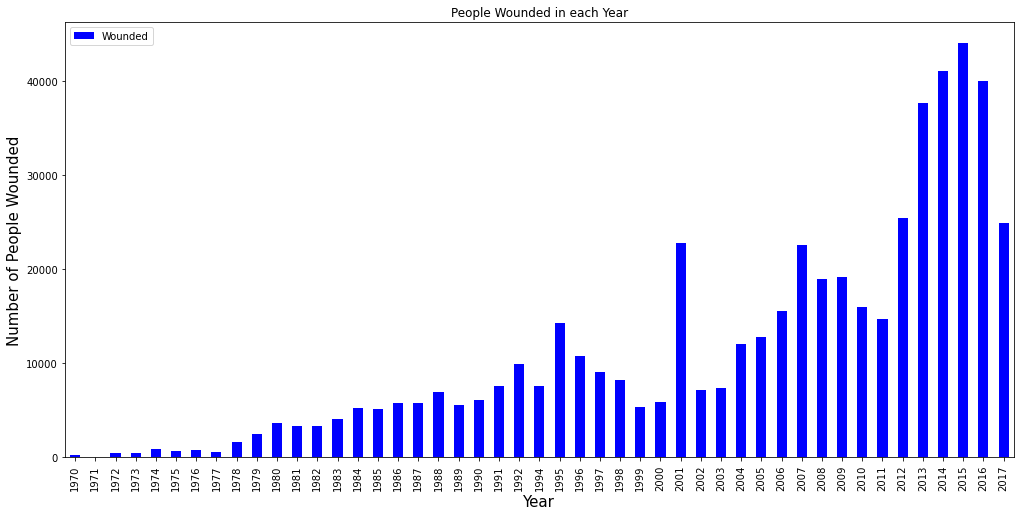

In [47]:
#killed
killed.plot(kind="bar",color="blue",figsize=(17,8))
plt.title("People Killed in each Year")
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)
plt.show()

#Wounded
wounded.plot(kind="bar",color="blue",figsize=(17,8))
plt.title("People Wounded in each Year")
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)
plt.show()

**Region Wise Attacks**

In [48]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


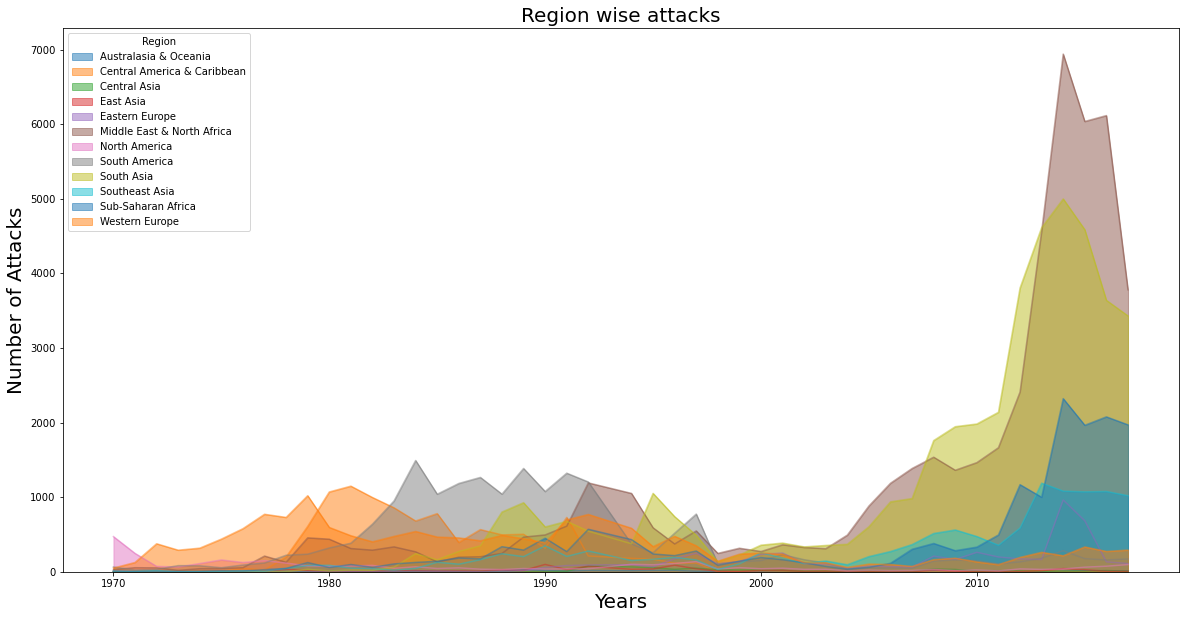

In [49]:
reg.plot(kind="area",stacked=False,alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [50]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

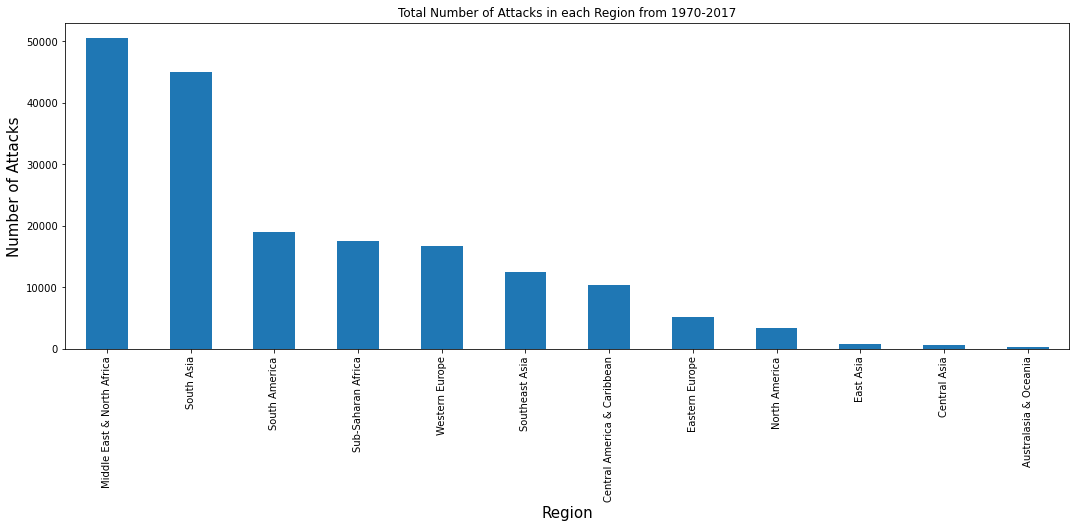

In [51]:
ra.plot(kind="bar",figsize=(18,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

3. Total Casualties(Killed + Wounded) in each Region

In [53]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


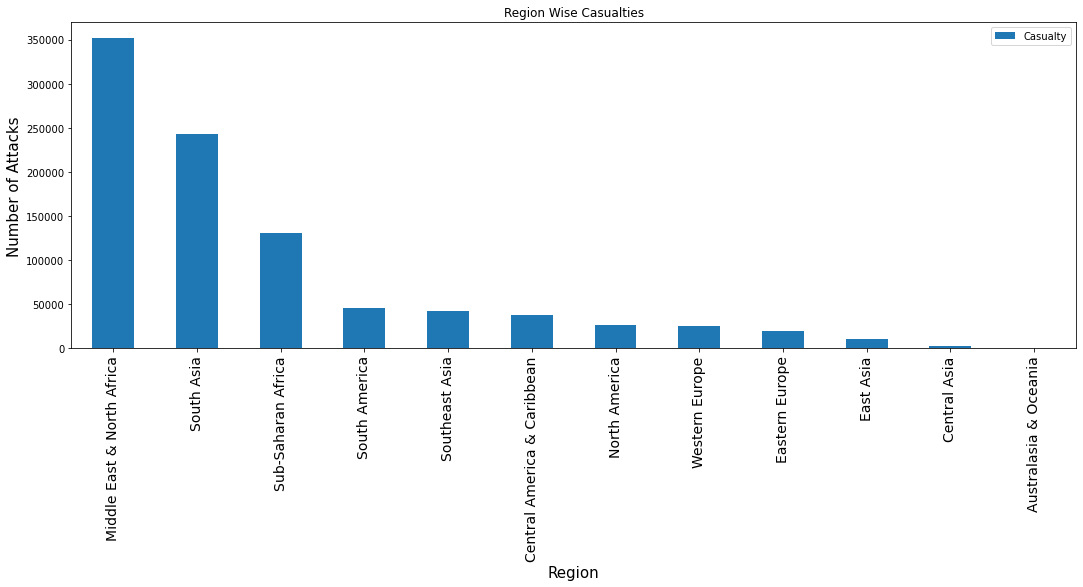

In [55]:
rc.plot(kind="bar",figsize=(18,6))
plt.title("Region Wise Casualties")
plt.xlabel("Region",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [56]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


Wounded in each Region

In [57]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


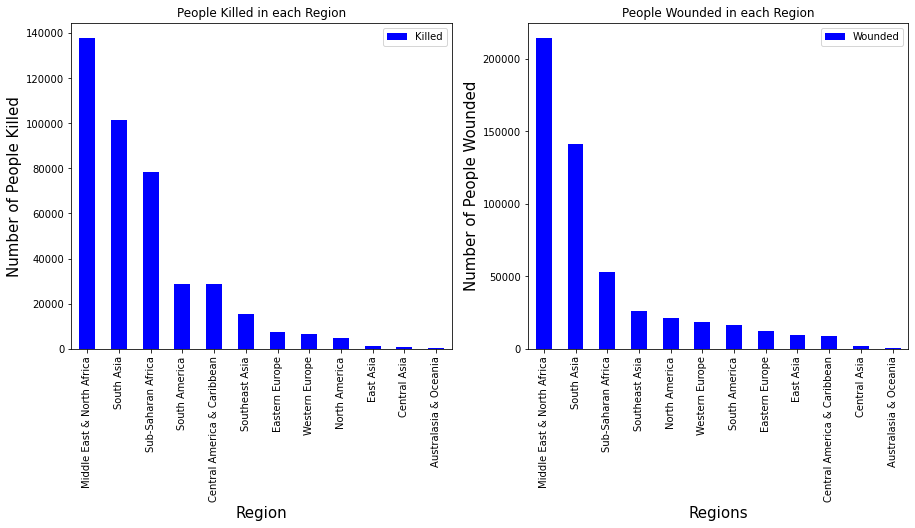

In [60]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
rk.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Region",fontsize=15)
ax0.set_ylabel("Number of People Killed",fontsize=15)

#Wounded
rw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Number of Attacks in each Country**

In [63]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

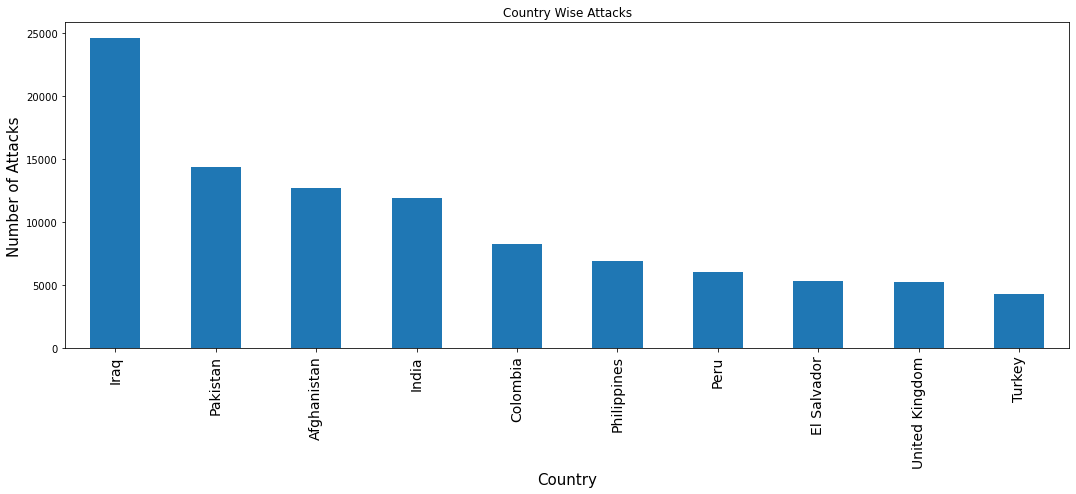

In [65]:
ct.plot(kind="bar",figsize=(18,6))
plt.title("Country Wise Attacks")
plt.xlabel("Country",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [98]:
cc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(10)
cc


,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


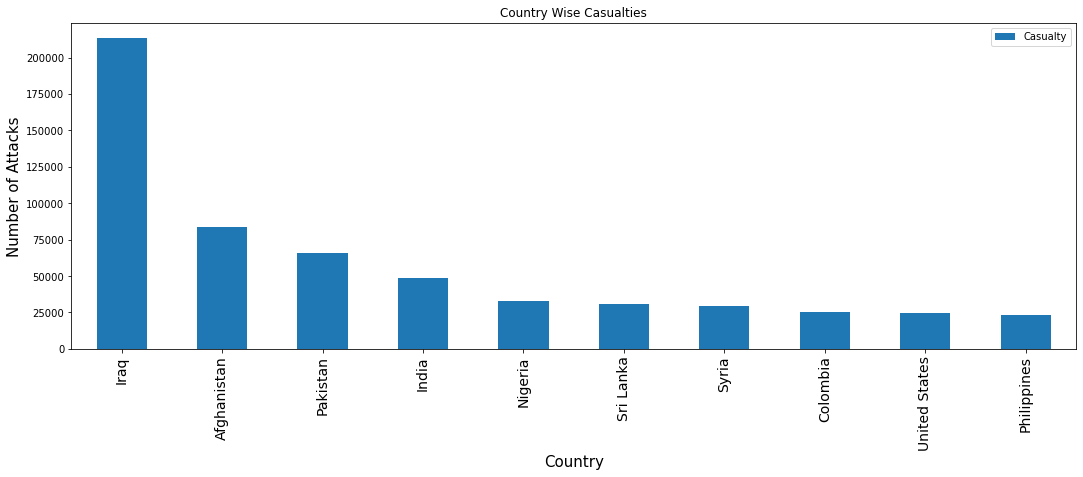

In [99]:
cc.plot(kind="bar",figsize=(18,6))
plt.title("Country Wise Casualties")
plt.xlabel("Country",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [67]:
ck=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False).head(10)
ck

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [68]:
cw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False).head(10)
cw

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


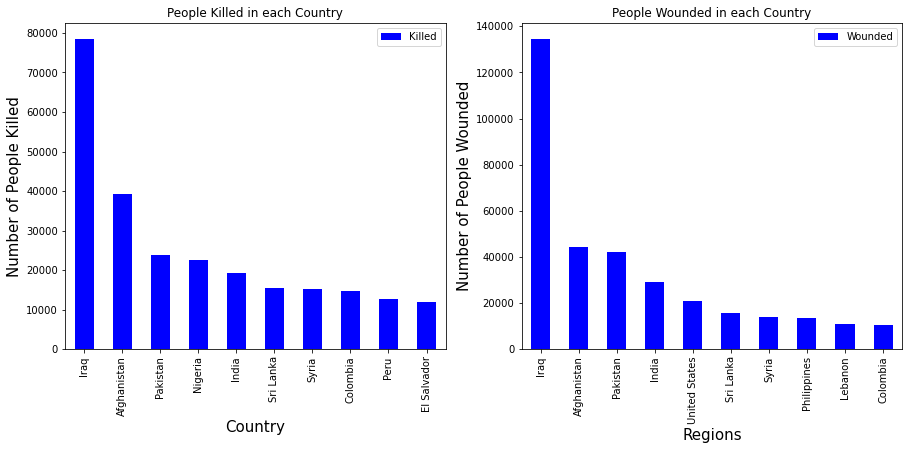

In [69]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
ck.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Country",fontsize=15)
ax0.set_ylabel("Number of People Killed",fontsize=15)

#Wounded
cw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Regions",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)

plt.show()

**City wise Attacks-Top 10**

In [70]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

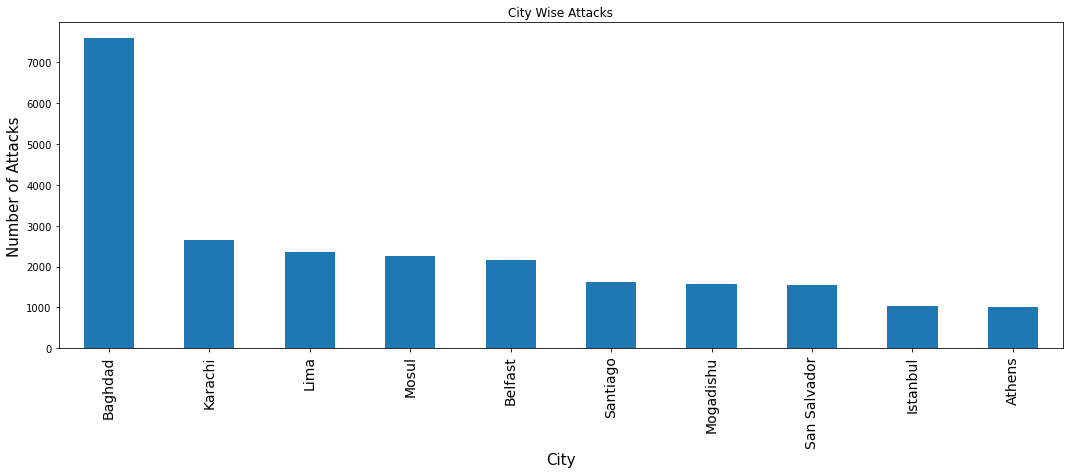

In [71]:
city.plot(kind="bar",figsize=(18,6))
plt.title("City Wise Attacks")
plt.xlabel("City",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

Number of Casualties

In [103]:
cityc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).head(10)
cityc

,Casualty
City,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0


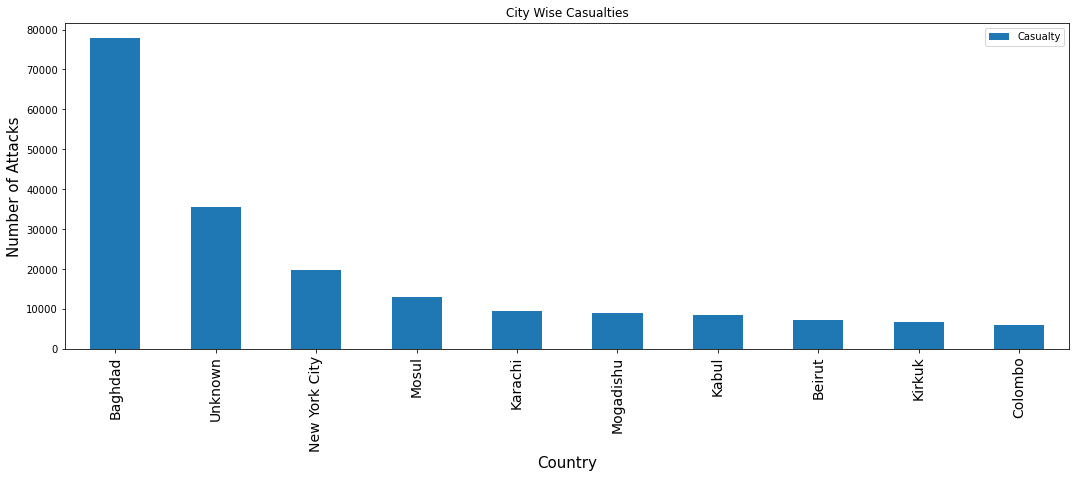

In [104]:
cityc.plot(kind="bar",figsize=(18,6))
plt.title("City Wise Casualties")
plt.xlabel("Country",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

**Number of people killed and wounded in each city**

In [75]:
cityk=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
cityk

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [76]:
cityw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
cityw

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


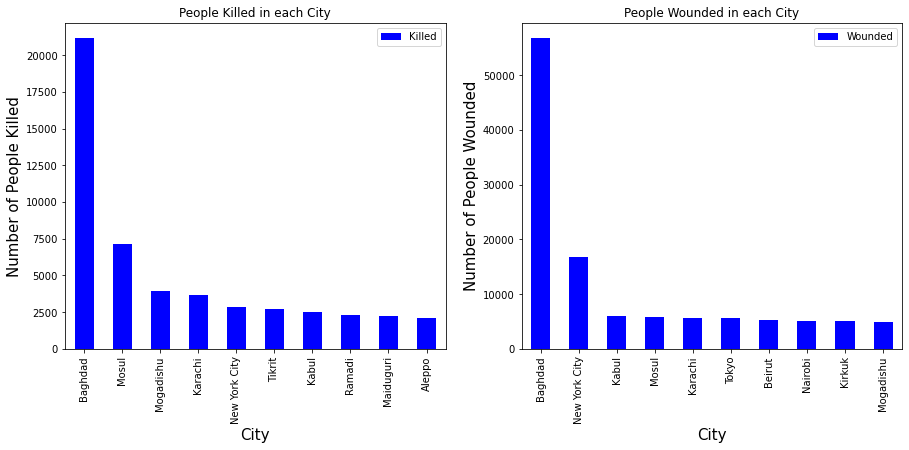

In [79]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
cityk.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("City",fontsize=15)
ax0.set_ylabel("Number of People Killed",fontsize=15)

#Wounded
cityw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("City",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Terrorist Group wise Attacks**

In [80]:
grp=df["Group Name"].value_counts()[1:11]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

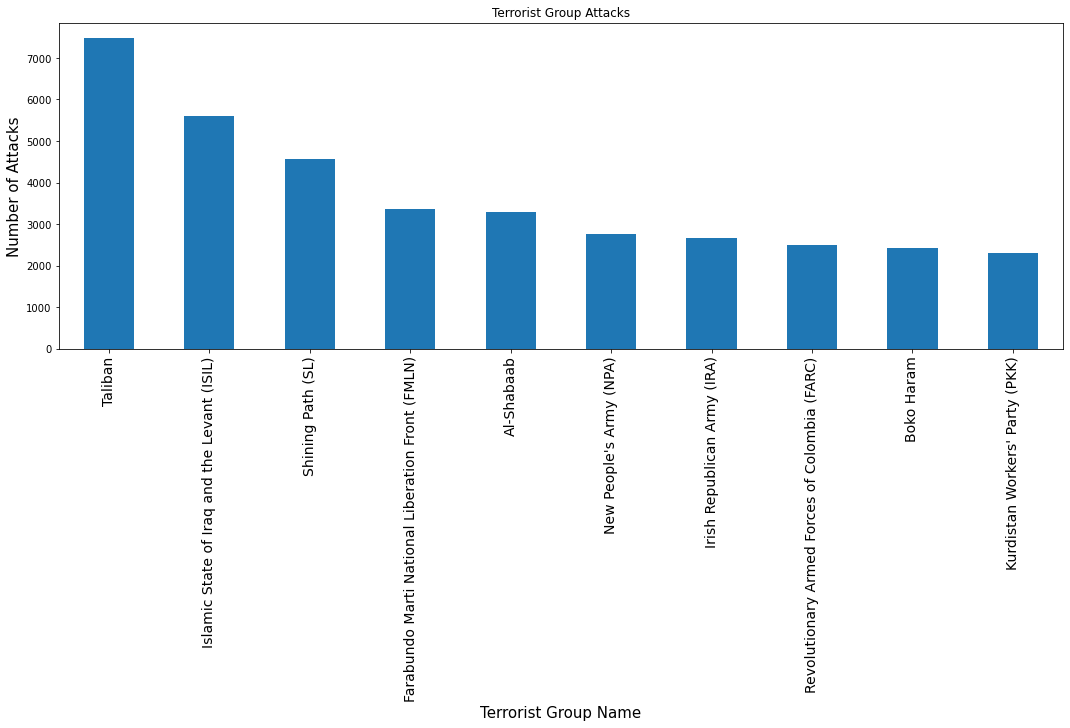

In [105]:
grp.plot(kind="bar",figsize=(18,6))
plt.title("Terrorist Group Attacks")
plt.xlabel("Terrorist Group Name",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

Number of Casualties

In [108]:
grpc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
grpc

#cc.plot(kind="bar",figsize=(18,6))
#plt.title("Country Wise Casualties")
#plt.xlabel("Country",fontsize=15)
#plt.xticks(fontsize=14)
#plt.ylabel("Number of Attacks",fontsize=15)
#plt.show()

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


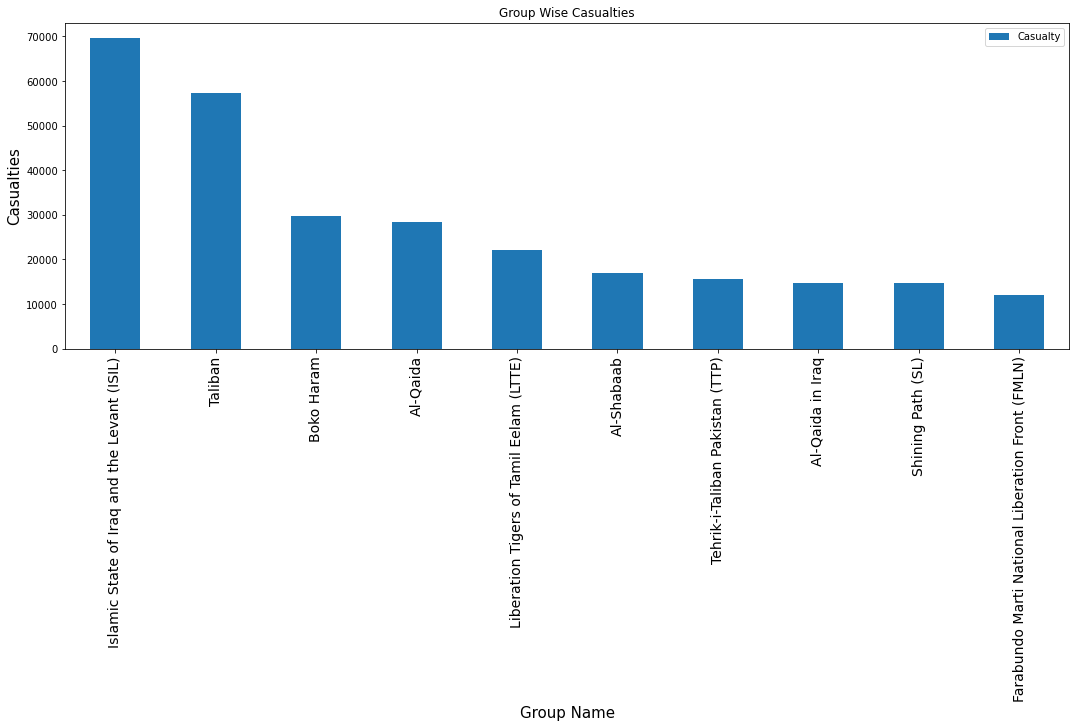

In [109]:
grpc.plot(kind="bar",figsize=(18,6))
plt.title("Group Wise Casualties")
plt.xlabel("Group Name",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Casualties",fontsize=15)
plt.show()

**Number of People killed and wounded**

In [83]:
grpk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
grpk

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


In [84]:
grpw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
grpw

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


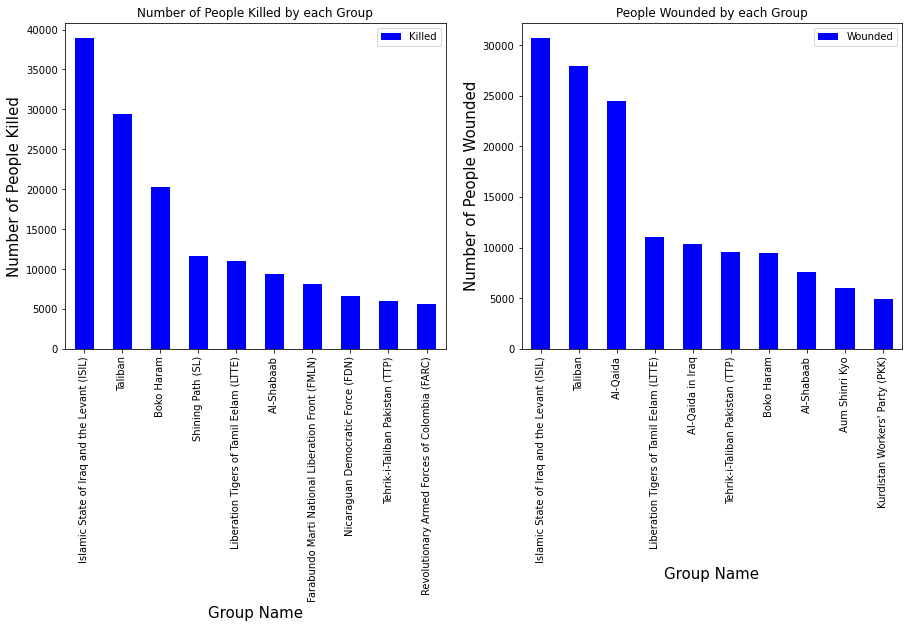

In [85]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
grpk.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("Number of People Killed by each Group")
ax0.set_xlabel("Group Name",fontsize=15)
ax0.set_ylabel("Number of People Killed",fontsize=15)

#Wounded
grpw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Group Name",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Based on Attack Type**

In [86]:
attack=df["Attack Type"].value_counts()
attack

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

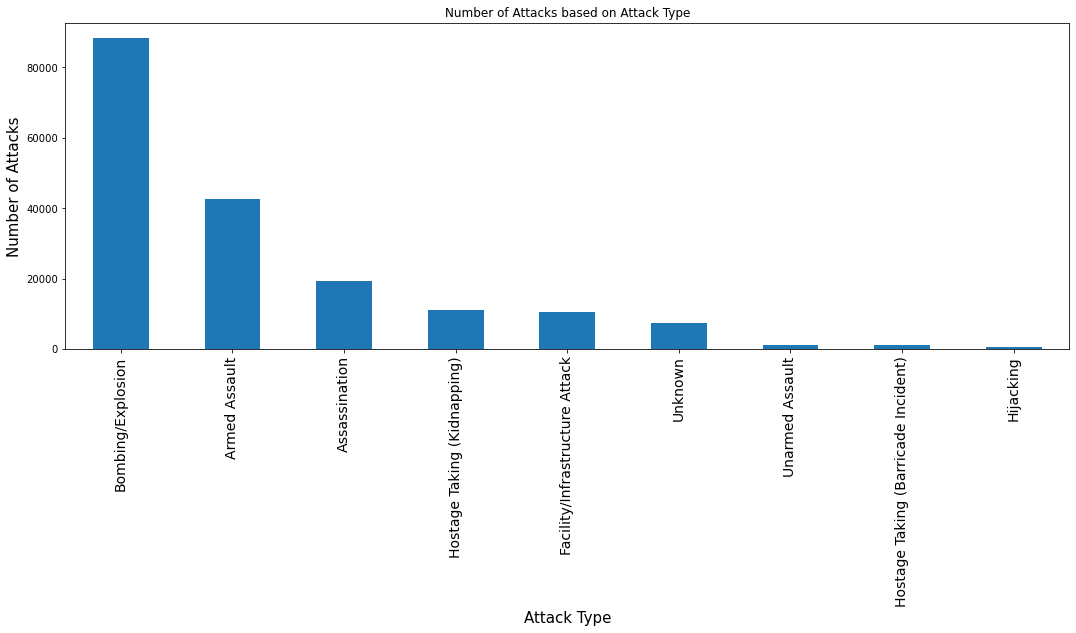

In [88]:
attack.plot(kind="bar",figsize=(18,6))
plt.title("Number of Attacks based on Attack Type")
plt.xlabel("Attack Type",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [110]:
attackc=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
attackc

#cc.plot(kind="bar",figsize=(18,6))
#plt.title("Country Wise Casualties")
#plt.xlabel("Country",fontsize=15)
#plt.xticks(fontsize=14)
#plt.ylabel("Number of Attacks",fontsize=15)
#plt.show()

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


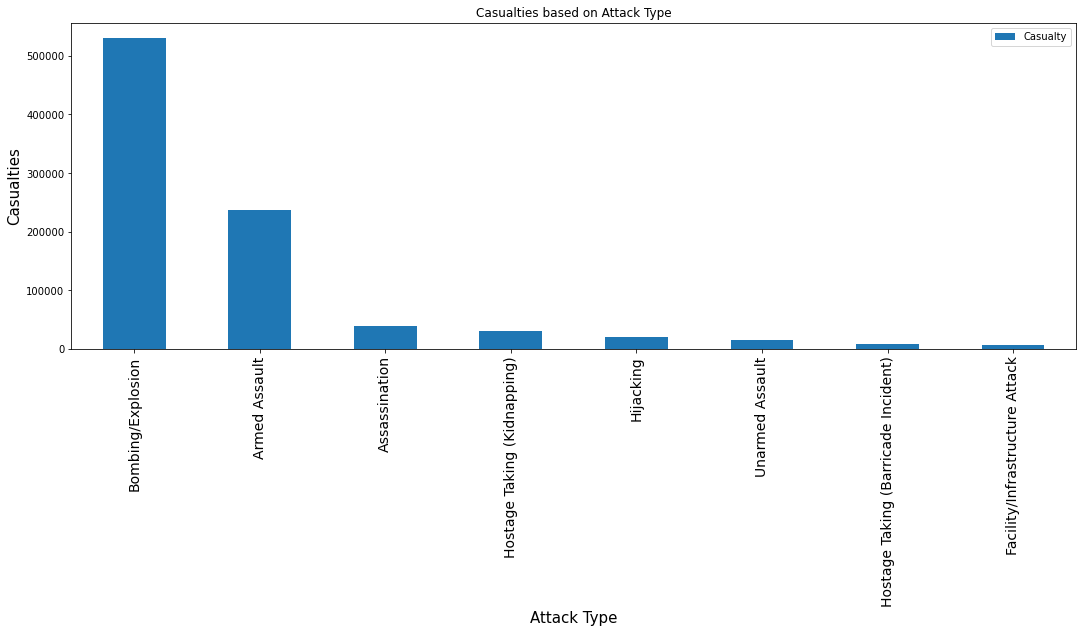

In [111]:
attackc.plot(kind="bar",figsize=(18,6))
plt.title("Casualties based on Attack Type")
plt.xlabel("Attack Type",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Casualties",fontsize=15)
plt.show()

In [89]:
attackk=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
attackk

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [91]:
attackw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
attackw

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


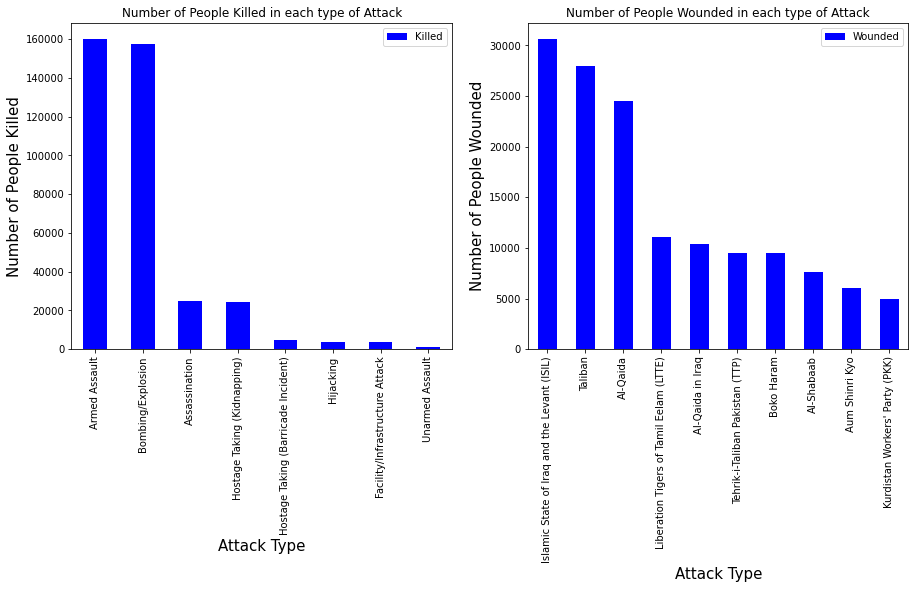

In [92]:
attackw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
attackw

**Based on Target Type**

In [95]:
target=df["Target Type"].value_counts()
target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

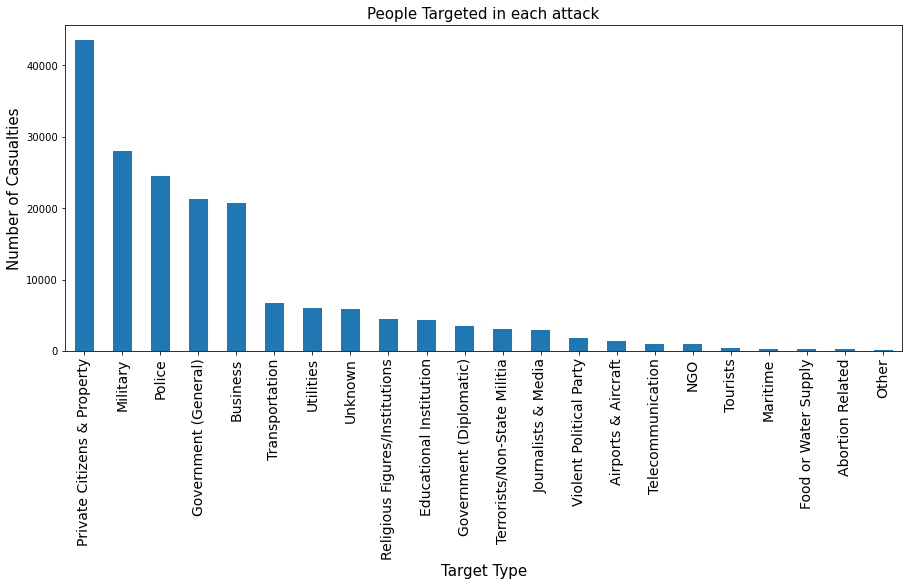

In [96]:
target.plot(kind="bar",figsize=(15,6))
plt.title("People Targeted in each attack",fontsize=15)
plt.xlabel("Target Type",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

In [112]:
targetc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
targetc

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


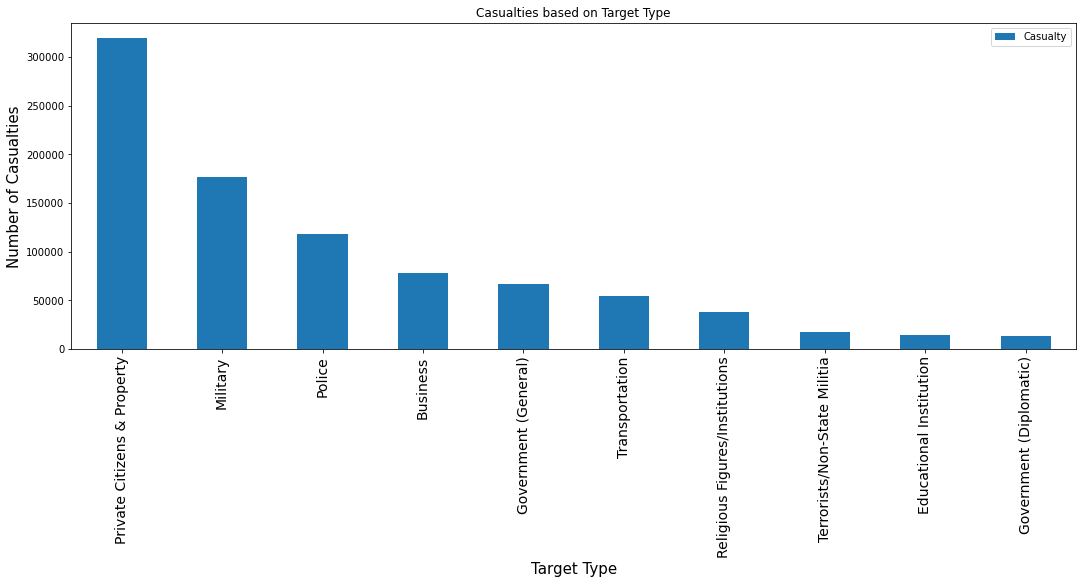

In [113]:
targetc.plot(kind="bar",figsize=(18,6))
plt.title("Casualties based on Target Type")
plt.xlabel("Target Type",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

In [114]:
targetk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
targetk

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Airports & Aircraft,3767.0


In [115]:
targetw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
targetw

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


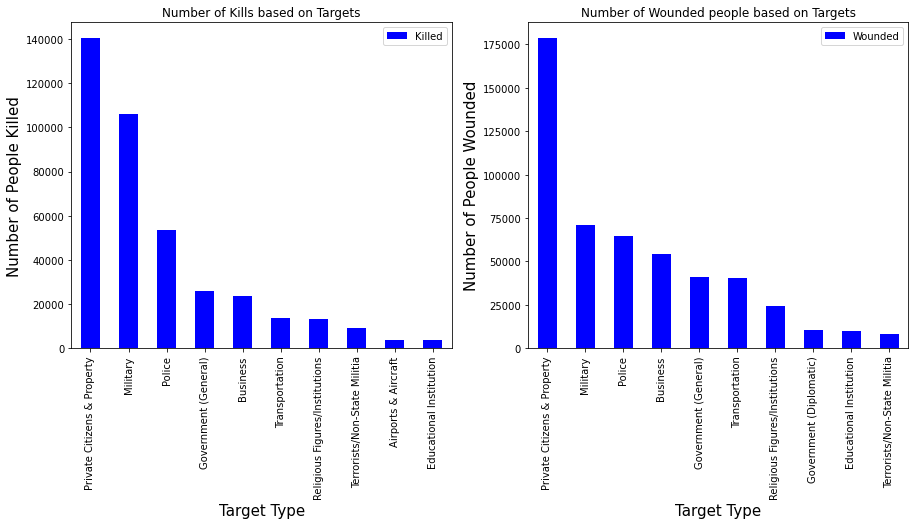

In [116]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
targetk.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("Number of Kills based on Targets")
ax0.set_xlabel("Target Type",fontsize=15)
ax0.set_ylabel("Number of People Killed",fontsize=15)

#Wounded
targetw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("Number of Wounded people based on Targets")
ax1.set_xlabel("Target Type",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Group+Country wise Attacks- Top 10**

In [118]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown").head(10)
gca.head(10)

Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

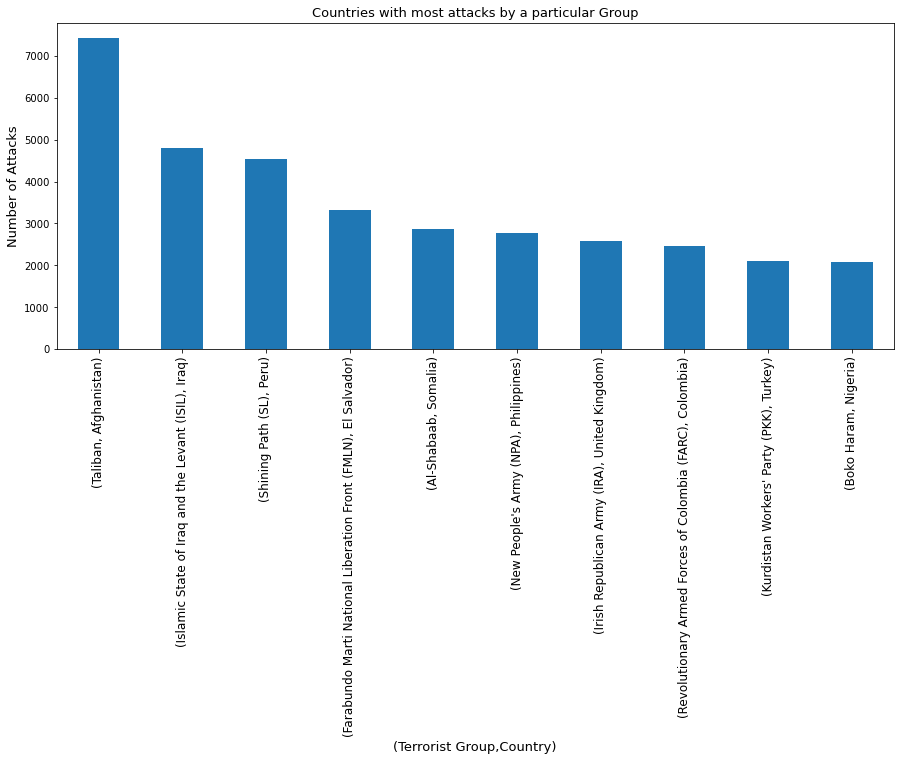

In [119]:
gca.plot(kind="bar",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [120]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

,,Casualty
Group Name,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


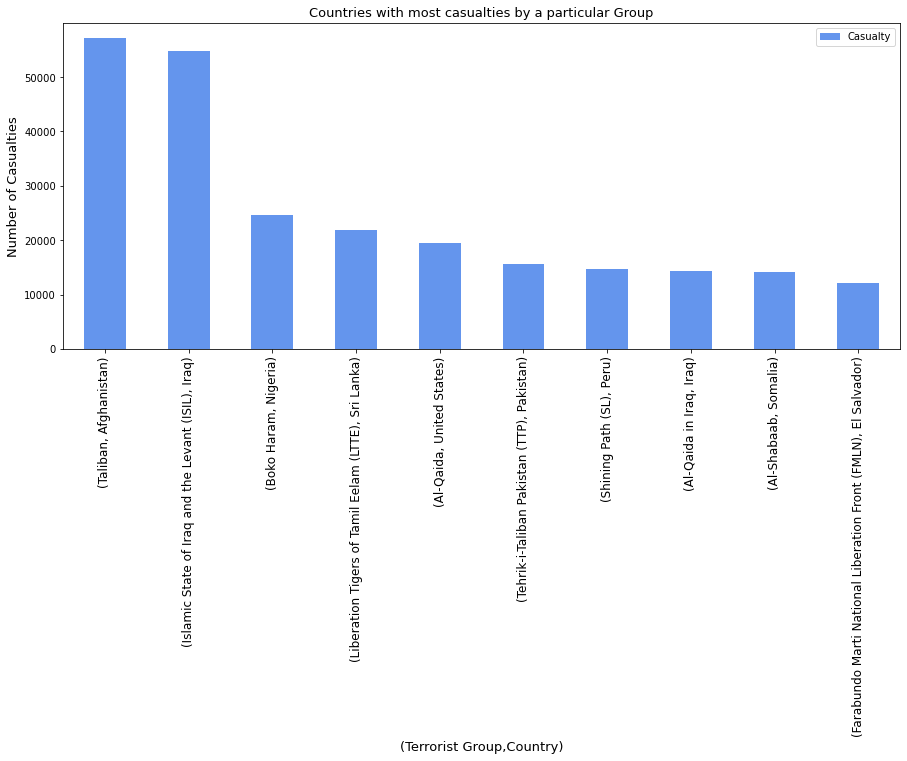

In [121]:
gcc.plot(kind="bar",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [122]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

,,Killed
Group Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


In [123]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

,,Wounded
Group Name,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


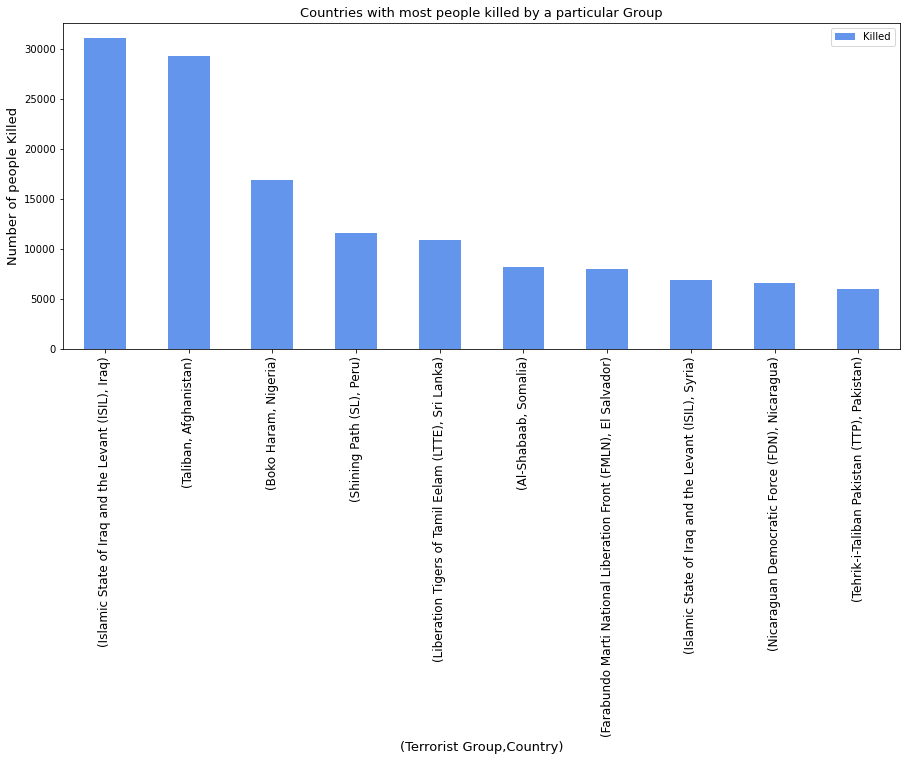

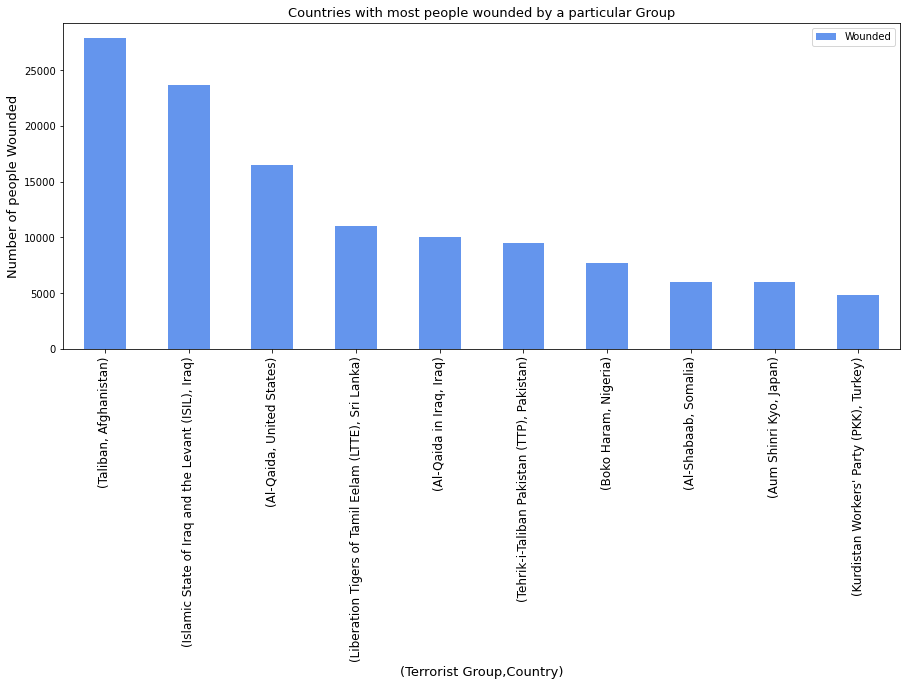

In [124]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

gck.plot(kind="bar",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

gcw.plot(kind="bar",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

**Observations:**  

1. Year wise Attacks :
  
  (i) Attacks  
    (a) Most number of attacks: 16903 in 2014  
    (b) Least number of attacks: 471 in 1971  
  
  (ii) Casualties  
    (a) Most number of casualties: 85618 in 2014  
    (b) Least number of casualties: 255 in 1971  
  
  (iii) Killed    
    (a) Most number of people killed: 44490 in 2014  
    (b) Least number of people killed: 173 in 1971  
  
  (iv) Wounded  
    (a) Most number of people wounded: 44043 in 2015  
    (b) Least number of people wounded: 82 in 1971    

2. Region wise Attacks :  
  
  (i) Attacks  
    (a) Most number of attacks: 50474 in "Middle East & North Africa"  
    (b) Least number of attacks: 282 in "Australasia & Oceania"  
  
  (ii) Casualties  
    (a) Most number of casualties: 351950 in "Middle East & North Africa"  
    (b) Least number of casualties: 410 in Australasia & Oceania  
  
  (iii) Killed  
    (a) Most number of people killed: 137642 in "Middle East & North Africa"  
    (b) Least number of people killed: 150 in "Australasia & Oceania"  
  
  (iv) Wounded  
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"  
    (b) Least number of people wounded: 260 in "Australasia & Oceania"  

3. Country wise Attacks [Top 10] :  
  
  (i) Attacks   
    (a) Most number of attacks: 24636 in "Iraq"  
    (b) Least number of attacks: 4292 in "Turkey"  
  
  (ii) Casualties  
    (a) Most number of casualties: 213279 in "Iraq"  
    (b) Least number of casualties: 22926 in "Philippines"  
  
  (iii) Killed  
    (a) Most number of people killed: 78589 in "Iraq"  
    (b) Least number of people killed: 12053 in "El Salvador"  
  
  (iv) Wounded  
    (a) Most number of people wounded: 134690 in "Iraq"  
    (b) Least number of people wounded: 10328 in "Colombia"  

4. City wise Attacks [Top 10] :  
  
  (i) Attacks  
    (a) Most number of attacks: 7589 in "Baghdad"  
    (b) Least number of attacks: 1019 in "Athens"  
  
  (ii) Casualties  
    (a) Most number of casualties: 77876 in "Baghdad"  
    (b) Least number of casualties: 5748 in "Aleppo"  
  
  (iii) Killed  
    (a) Most number of people killed: 21151 in "Baghdad"  
    (b) Least number of people killed: 2125 in "Aleppo"  
  
  (iv) Wounded  
    (a) Most number of people wounded: 56725 in "Baghdad"  
    (b) Least number of people wounded: 4955 in "Mogadishu"  

5. Terrorist Group wise Attacks [Top 10] :  
  
  (i) Attacks  
    (a) Most number of attacks: 7478 by "Taliban"  
    (b) Least number of attacks : 2418 by "Boko Haram"  
  
  (ii) Casualties  
    (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"  
    (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"  
  
  (iii) Killed  
    (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"  
    (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"  
  
  (iv) Wounded  
    (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"  
    (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"  

6. Attack Type wise Attacks:  
  
  (i) Attacks  
    (a) Most number of attacks : 88255 by "Bombing/Explosion"  
    (b) Least number of attacks : 659 by "Hijacking"  
  
  (ii) Casualties  
    (a) Most number of casualties : 530007 by "Bombing/Explosion"  
    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"  
  
  (iii) Killed  
    (a) Most number of people killed : 160297 by "Armed Assault"  
    (b) Least number of people killed : 880 by "Unarmed Assault"  
  
  (iv) Wounded  
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"  
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"  

7. Target Type wise Attacks:  
  
  (i) Attacks  
    (a) Most number of attacks : 43511 over "Private Citizens & Property"  
    (b) Least number of attacks : 263 over "Abortion Related"  
  
  (ii) Casualties  
    (a) Most number of casualties : 319176 over "Private Citizens & Property"  
    (b) Least number of casualties : 56 over "Abortion Related"  
  
  (iii) Killed  
    (a) Most number of people killed : 140504 over "Private Citizens & Property"  
    (b) Least number of people killed : 10 over "Abortion Related"  
  
  (iv) Wounded  
    (a) Most number of people wounded : 178672 over "Private Citizens & Property"  
    (b) Least number of people wounded : 46 over "Abortion Related"  

8. Group and Country wise Attacks [Top 10] :  
  
  (i) Attacks  
    (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan"  
    (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria"  
  
  (ii) Casualties  
    (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan"  
    (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)" in "El Salvador"  
  
  (iii) Killed  
    (a) Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq"  
    (b) Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan"  
  
  (iv) Wounded  
    (a) Most number of people wounded : 27871 by "Taliban" in "Afghanistan"  
    (b) Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey"  
